<a href="https://colab.research.google.com/github/nujudaly/T5/blob/main/Nujud_Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Twaiq/Students (Shared)/5- Weekly Task July25/Task 2/Task (2) Dataset.csv')

In [3]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [4]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [22]:
#Using Aggregation to form a comprehensive summary to helps us understand big patterns


grouped_data = df.groupby('City').agg(
    Total_JamsDelay=('JamsDelay', 'sum'),
    Average_Jamscount =('JamsCount', 'mean'),
    Maximum_JamsLength 	=('JamsLength', 'max'),
    Minimum_TravelTimeLive 	=('TravelTimeLive', 'min')
)
grouped_data

,Total_JamsDelay,Average_Jamscount,Maximum_JamsLength,Minimum_TravelTimeLive
City,,,,
Abudhabi,416540.3,29.870859,343.1,46.723235
Al-ain,87351.8,6.837733,26.5,49.905751
Cairo,2338591.2,65.302186,340.8,65.142239
Dammam,475552.2,33.675983,289.4,48.845588
Doha,1109204.0,41.909457,370.2,57.122153
Dubai,6233031.6,185.216341,1173.9,47.918815
Jeddah,703747.7,48.843944,485.0,53.375215
Kuwait,2151705.7,68.176619,348.3,51.335552
Mecca,165653.1,11.925207,246.9,50.429372


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

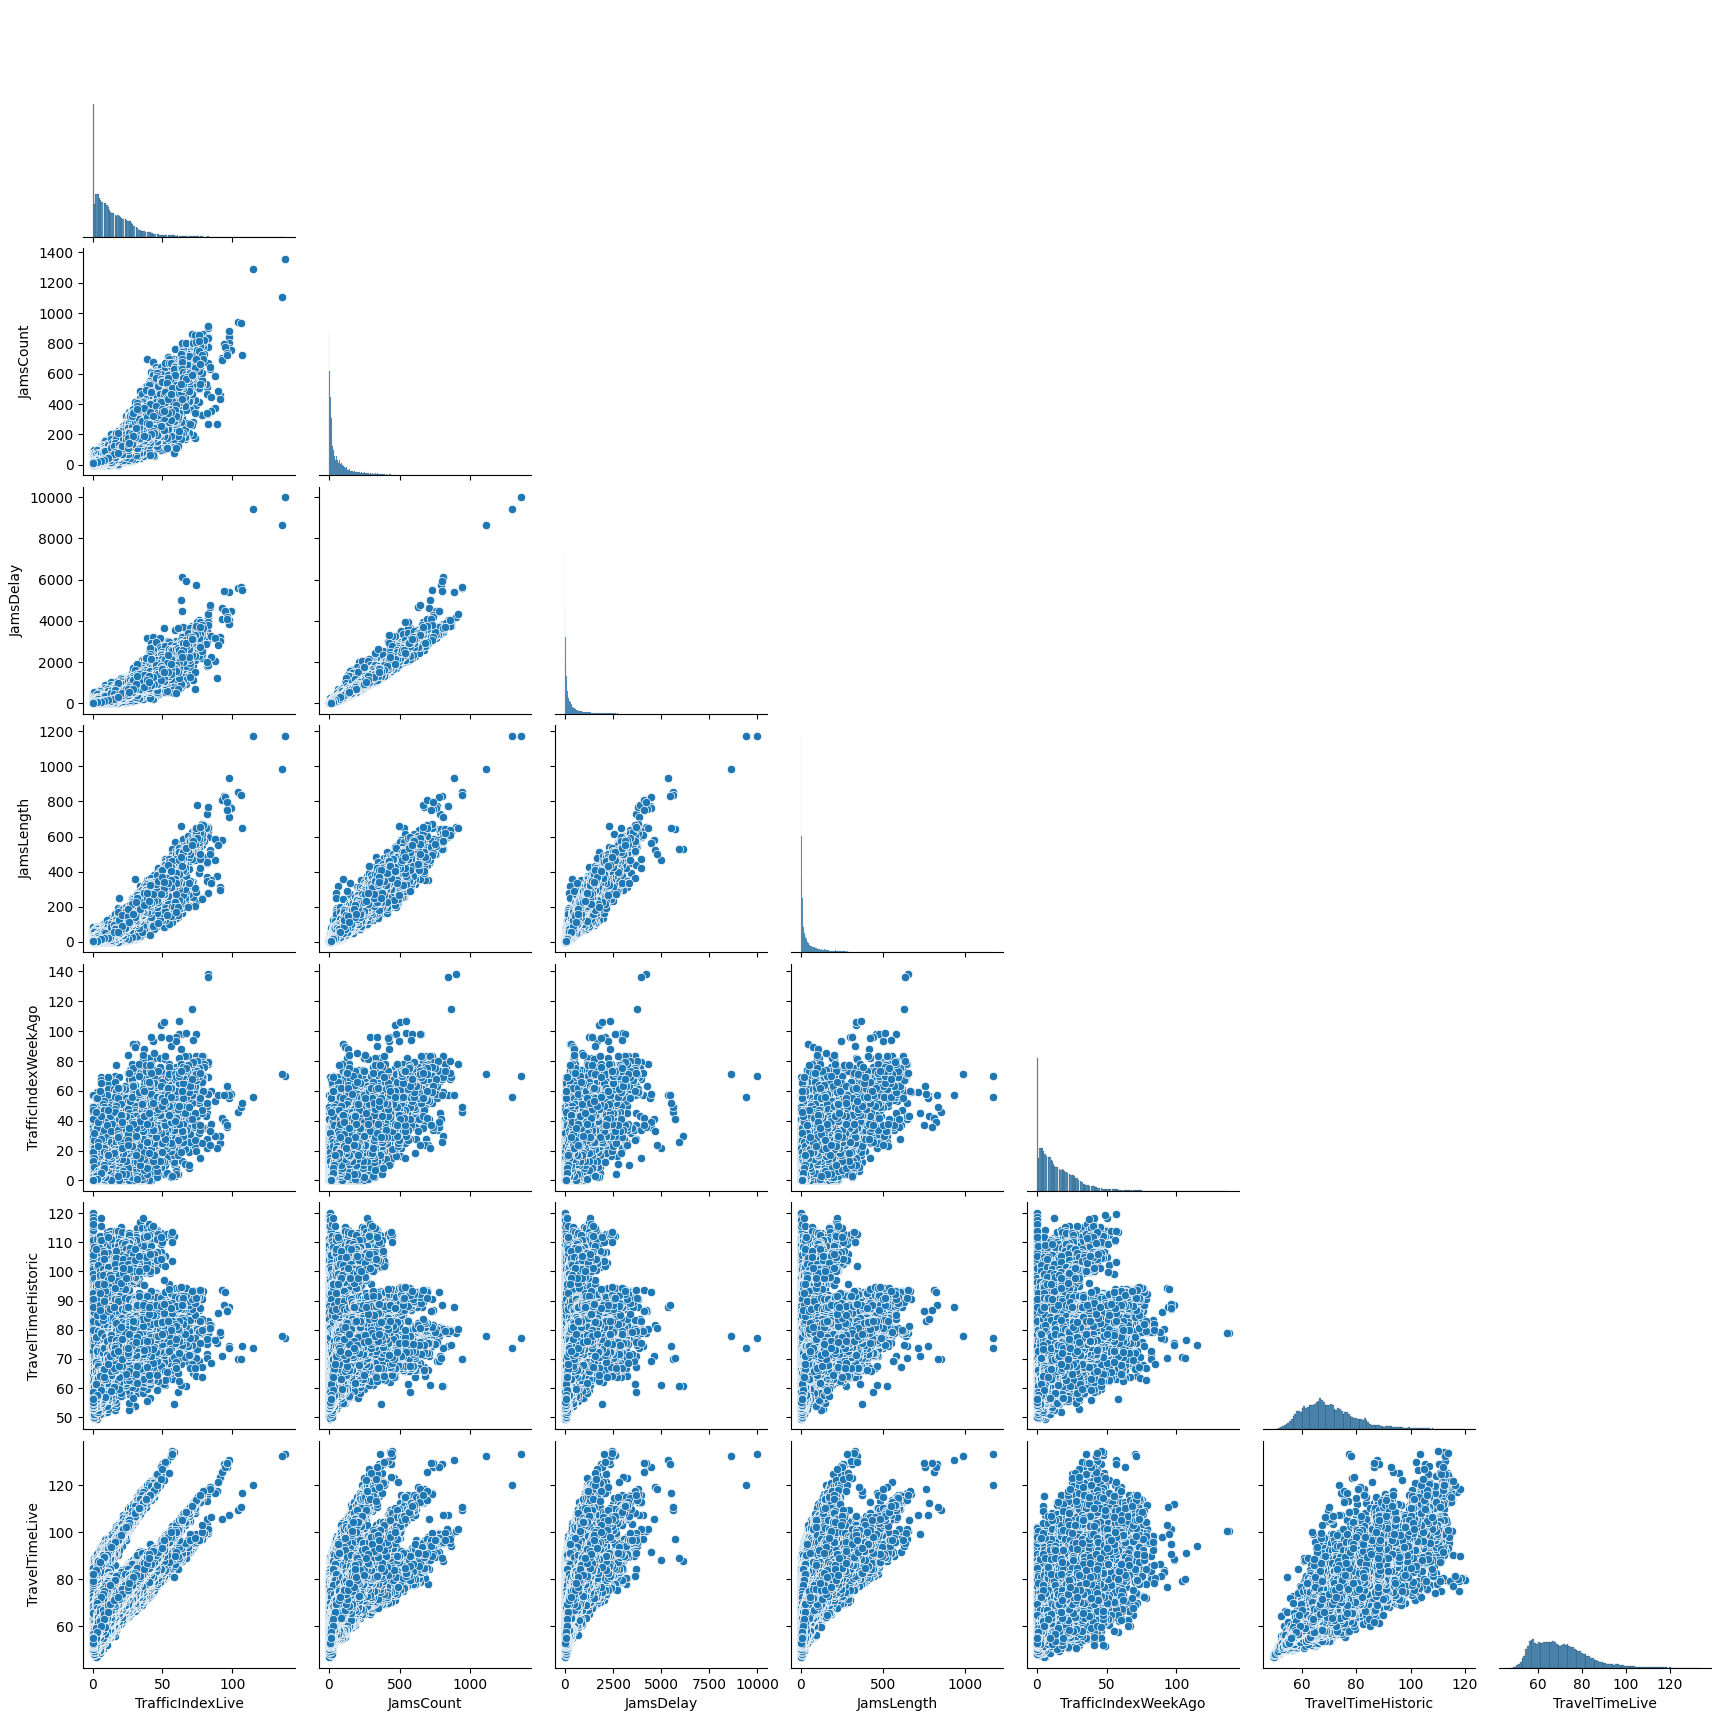

In [28]:
# plot a pairplot to visualize distributions for all numeric variables.
sns.pairplot(df, corner=True)

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


<ipython-input-31-b589057092d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='City', y='JamsCount', palette='dark')


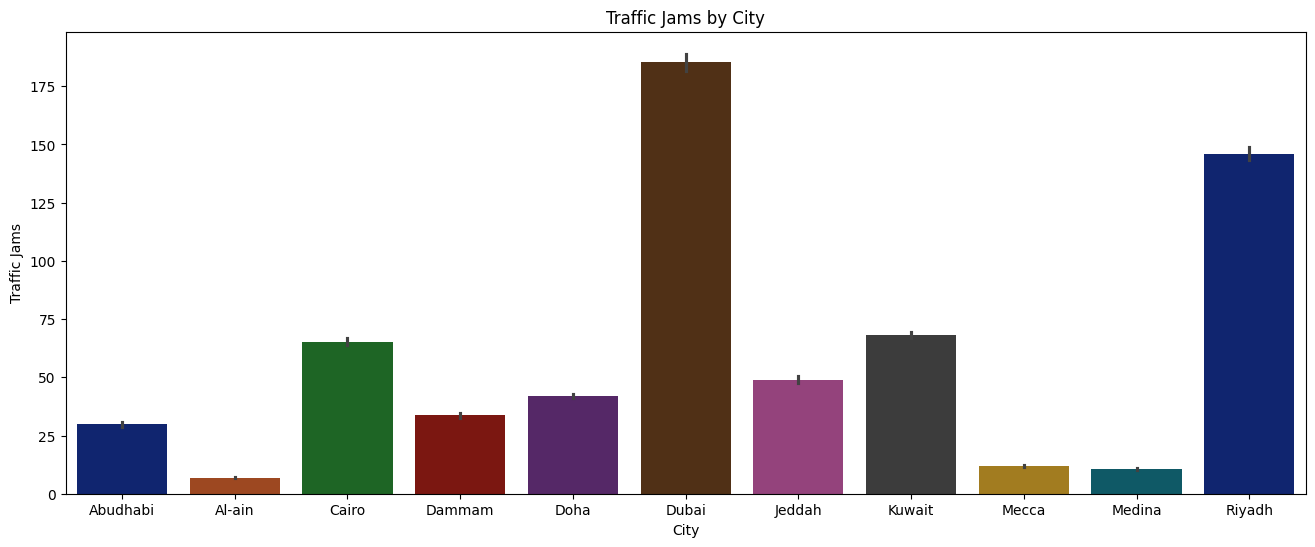

In [31]:
# Bar Chart to show the traffic jams in each city
plt.figure(figsize=(16, 6))
sns.barplot(data=df, x='City', y='JamsCount', palette='dark')
plt.title('Traffic Jams by City')
plt.xlabel('City')
plt.ylabel('Traffic Jams')
plt.xticks(rotation=360)
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


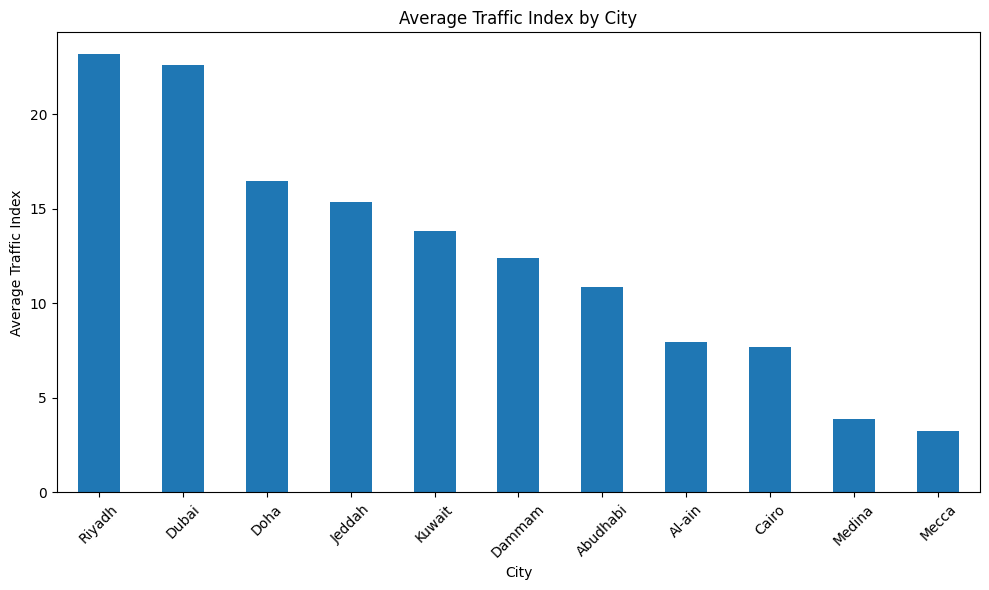

In [35]:
city_traffic = df.groupby('City')['TrafficIndexLive'].mean().sort_values(ascending=False)

# bar plot to visualize the average traffic index by city
plt.figure(figsize=(10, 6))
city_traffic.plot(kind='bar')
plt.title('Average Traffic Index by City')
plt.xlabel('City')
plt.ylabel('Average Traffic Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

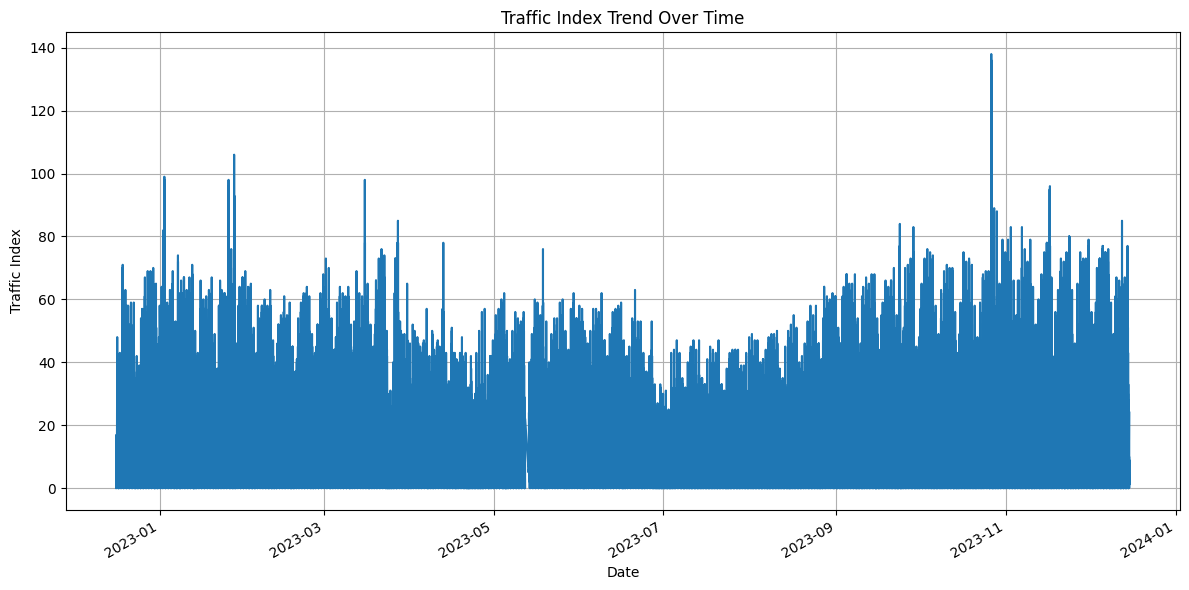

In [36]:

# time series plot to visualize the trend of traffic index over time
plt.figure(figsize=(12, 6))
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime')['TrafficIndexLive'].plot()
plt.title('Traffic Index Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.grid(True)
plt.tight_layout()
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

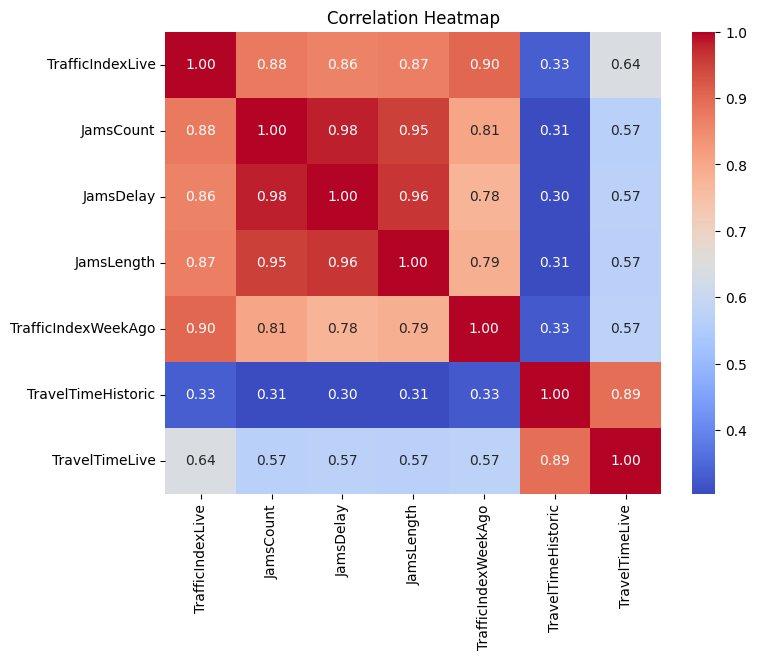

In [33]:
# Calculate the correlation matrix for the dataset and draw the heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

Key Insights


*  The analysis reveals significant variations in traffic congestion levels across different cities. Dubia experience consistently higher traffic volumes compared to others.
    

*  Certain times of the day or of the week experiencing higher traffic levels.
    

* There is a large correlation
between traffic index and Jams count, jam delay, and jam length, indicating that higher traffic volumes are associated with increased congestion, and delays.

Conclusions


* Cities with higher traffic congestion should prioritize implementing targeted traffic management strategies, such as intelligent traffic signal systems, optimized road networks, and public transportation enhancements.



*  The insights derived from the data analysis can inform data-driven decision-making processes for transportation infrastructure development.



